In [3]:
import numpy as np
from util_mjw.config import Config
from reconstructor_mjw import Reconstructor

import matplotlib.pyplot as plt
import h5py
import time
from reconstruct_all import reconstruct,read_hdf

16
110


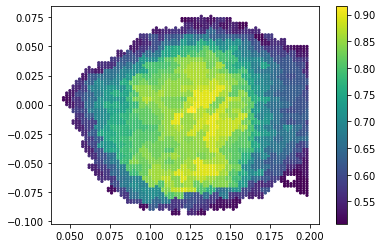

KeyboardInterrupt: 

In [7]:

grain_Ids = [23,24]

for Id in grain_Ids:
    print(Id)
    reconstruct(f'ConfigFiles/test_all/Grain_{Id}.yml',NumD = 1000,num_it=15,plot=True)

In [ ]:
grain_Ids =  [1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,37,38,39,40]
print(len(grain_Ids))
tmpx,tmpy,realS = [],[],[]
for Id in grain_Ids:
    tx,ty,S = read_hdf(f'ConfigFiles/test_all/Grain_{Id}.yml')
    tmpx.append(tx)
    tmpy.append(ty)
    realS.append(S)
tmpx = np.concatenate(tmpx)
tmpy = np.concatenate(tmpy)
realS = np.concatenate(realS)

In [ ]:
print(realS.shape)
comp=[2,2]
inds = [[0,0],[1,1],[2,2],[1,2],[0,2],[0,1]]
labels =[r'$\varepsilon_{xx}$',r'$\varepsilon_{yy}$',r'$\varepsilon_{zz}$',r'$\varepsilon_{yz}$',r'$\varepsilon_{xz}$',r'$\varepsilon_{xy}$']

fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(18,10))
for ax,ind,label in zip(axs.ravel(),inds,labels):
    s = realS[:,ind[0],ind[1]]-1
    cax=ax.scatter(tmpx,tmpy,c=s,
                   s=3,cmap='jet',
                   vmin=s.mean()-np.std(s)*3,vmax=s.mean()+np.std(s)*3
                  # vmin=-0.003,vmax=0.0055
                  )
    cbar = fig.colorbar(cax,ax=ax)
    ax.set_title(label)
# fig.savefig('Szz_1.png',format='png',dpi=300)
plt.savefig('Strain_all',dpi=300)
plt.show()

In [ ]:


def make_grain_dict(pixels,tmpx,tmpy):
    xx,yy,oo,mask = pixels
    if dict_type = 'voxel':

        grain_dict = {}

        for i in range(xx.shape[0]):   
            g = {}
            for j in range(xx.shape[1]):
                g[f'Peak_{j}'] = np.stack([xx[i,j],yy[i,j],oo[i,j]])

            grain_dict[f'Voxel_{np.round(tmpx[i],3)}_{np.round(tmpy[i],3)}'] = g

        # print(grain_dict['Voxel_-0.166_0.022'])


    if dict_type = 'peak':
        grain_dict = {}

        for i in range(xx.shape[1]):  
            p = {}
            mask_p = mask[:,i]
            det_x = xx[mask_p,i]
            det_y = yy[mask_p,i]
            det_o = oo[mask_p,i]
            vox_x = tmpx[mask_p]
            vox_y = tmpy[mask_p]
            for x,y,o,sx,sy in zip(det_x,det_y,det_o,vox_x,vox_y):
                sx = np.round(sx,3)
                sy = np.round(sy,3)
                if f'Pixel_{x}_{y}_{o}' in p.keys():
                    p[f'Pixel_{x}_{y}_{o}'].append( [sx,sy])
                else:
                    p[f'Pixel_{x}_{y}_{o}'] =  [[sx,sy]]


        grain_dict[f'Peak_{i}'] = p

    return grain_dict




In [ ]:



def save_as_hdf(peaks,gs,outfile):
    
    data_file = h5py.File(outfile,'w')
    for pk,g in zip(peaks,gs):
        data_file.create_group('%s'%g)
        data_file['%s'%g].create_dataset('reflection',data=g,dtype='i')
        data_file['%s'%g].create_dataset('data',data=pk,dtype='f')
    data_file.close()
    return

In [ ]:
4050/90

In [ ]:
# import numpy as np
# from cuda import cuda, nvrtc






# class gpu_array:
    
#     def __init__(self,size,dtype,h_array=None):
#         if h_array is not None:
#             self.h_array = h_array
#             err, self.d_class = cuda.cuMemAlloc(self.h_array.nbytes)
#             err, cuda.cuMemcpyHtoD(self.d_class, self.h_array.ctypes.data, self.h_array.nbytes)
#         else: 
#             self.h_array = np.empty(size,dtype=dtype)
#             err, self.d_class = cuda.cuMemAlloc(self.h_array.nbytes)
            
#         self.d_array = np.array([int(self.d_class)], dtype=np.uint64)
#     def get(self):
#         err, = cuda.cuMemcpyDtoH(self.h_array.ctypes.data, self.d_class, self.h_array.nbytes)
#         err, = cuda.cuMemFree(self.d_class)
#         print(err)
#         return self.h_array

        
        
    
# def empty(size,dtype):
#     array = gpu_array(size,dtype)
#     return array

# def to_gpu(array):
#     array = gpu_array(array.size,array.dtype,h_array=array)
#     return array


# for i in range(10):
#     a = np.ones(10000)
#     b = np.ones(300)
#     aD = to_gpu(a)
#     bD = empty(1000,dtype=np.int32)
    
    
#     m = aD.get()
#     c = bD.get()